# Open Legal Data

Open Legal Data is an open data project that aims to make legal data more available to the public. It tackles the fact that most of the information produced by courts in Germany and in many countries isn't accessible or displayed in a structured format.

The projects offers an API through which users can retrieve data on many court dedicions in Germany.

Links to the data, the API and the Project, can be found here:

1) Github repository: https://github.com/openlegaldata

2) Project's website: http://openlegaldata.io/

3) API: https://de.openlegaldata.io/

# Project's Goal

In this project, we'll take advantage of the functionalities of the Open Legal Data API and retrieve data from multiple courts. We'll then clean it and prepare it for analysis. 

## Importing Libraries

In [7]:
import json
import requests
import pandas as pd

In [8]:
# This cell reads the API key
# For many usages of the Open Legal Data API a key isn't necessary though.

with open(r"C:\Users\celio\My Projects\Guided Projects\Bewerbung\Open Legal Data\api_key.txt") as file:
    key = file.read()
    
headers = {"Authorization":key} # The headers argument will be passed to the get method of the requests library

## Function To Make Requests

In [9]:
def request_and_read(endpoint,page_size,page):
    
    endpoint = str(endpoint) # Converts endpoint to string
    request = requests.get(endpoint,
                          headers = headers,
                          params = {"page_size":page_size,
                                   "page":page}) # Calls the get method and passes arguments
    content = json.loads(request.content) # reads content
    results = content["results"] # Accesses key containing the results
    return results

## Instatiate a Dictionary To Receive Requests

The API uses pagination. Even though it's possible to set the page size for a very large number, we'll make requests to multiple pages and every page will be stored in a different key of the dictionary.

In [10]:
# The API uses pagination.
case_pages = dict.fromkeys(range(1,11),[])
case_pages

{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: []}

## Make Requests

With the read and request function, we can make the requests and store them to keys of the dictionary.

In [11]:
# This cell might take some time to run
page_number = 1
for key in case_pages:
    case_pages[key] = request_and_read(r"https://de.openlegaldata.io/api/cases/",1000,page_number)
    page_number+=1

# Organize Requests

The keys of the case pages dictionary now contain a list of dictionaries. Every dictionary has the following keys:

In [17]:
# Accessing the key 1 of the case_pages dictionary
# Then accessing the first element of the list of dictionaries contained in this key
print(case_pages[1][0].keys())

dict_keys(['id', 'slug', 'court', 'file_number', 'date', 'created_date', 'updated_date', 'type', 'ecli', 'content'])


 We can now write a function to get the data on the cases. It will unpack the values in every key of the dictionaries contained in the case_pages.

In [18]:
def get_case_data(a_list):
    # Instantiantes a Dictionary
    case_info = {"id":[],"slug":[], "file_number":[],"date":[],"created_date":[],
            "updated_date":[],"type":[],"ecli":[],"content":[]}
    # Loops through the keys of the dictionary
    # Appends values to the main dictionary cases_info
    for element in a_list:
        case_info["id"].append(element["id"])
        case_info["slug"].append(element["slug"])
        case_info["file_number"].append(element["file_number"])
        case_info["date"].append(element["date"])
        case_info["created_date"].append(element["created_date"])
        case_info["updated_date"].append(element["updated_date"])
        case_info["type"].append(element["type"])
        case_info["ecli"].append(element["ecli"])
        case_info["content"].append(element["content"])
        
    return case_info #A dictionary containing, in each key, a list of the objects found in case_pages
        

A for loop to extract the files with the function above.

In [19]:
case_info = dict.fromkeys(range(1,11),[]) # Instatiates a Dictionary to get the info on the cases.

for key in case_info: # Loops through the dictionaries in case pages and unpacks the values from each key.
    case_info[key] = get_case_data(case_pages[key])
    

We now have, in every key of the case_info dictionary, data corresponding to each page of the case_pages dictionary. That is, all the results stored in case_pages[1], for example, are now unpacked in case_info[1] and so on.

Below, we can see the keys of case_info dictionary.

In [21]:
case_info[1].keys()

Index(['id', 'slug', 'file_number', 'date', 'created_date', 'updated_date',
       'type', 'ecli', 'content'],
      dtype='object')

The data, collected as it is, can be transformed into a pandas DataFrame.

In [22]:
for key in case_info: # Loops through the keys of case_info and transforms every key in a data frame
    case_info[key] = pd.DataFrame(case_info[key])

Since every key contains the same data, we can simply concatenate the DataFrames.

In [23]:
cases = pd.concat(case_info) # Vertical concatenation of DataFrames

 Checking results:

In [24]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (1, 0) to (10, 999)
Data columns (total 9 columns):
id              10000 non-null int64
slug            10000 non-null object
file_number     10000 non-null object
date            10000 non-null object
created_date    10000 non-null object
updated_date    10000 non-null object
type            10000 non-null object
ecli            10000 non-null object
content         10000 non-null object
dtypes: int64(1), object(8)
memory usage: 420.1+ KB


Displaying DataFrame

In [12]:
cases.head() 

id                            slug    file_number        date  \
0 0  327286   bverfg-2020-03-25-2-bvr-11320   2 BvR 113/20  2020-03-25   
  1  327121   bverfg-2020-03-18-1-bvr-33720   1 BvR 337/20  2020-03-18   
  2  327530        bag-2020-03-12-6-azm-120     6 AZM 1/20  2020-03-12   
  3  327118     bverfg-2020-03-11-2-bvl-517     2 BvL 5/17  2020-03-11   
  4  326495  bverfg-2020-03-05-2-bvr-210018  2 BvR 2100/18  2020-03-05   

             created_date          updated_date                    type  \
0 0  2020-04-17T10:00:22Z  2020-04-17T10:06:52Z   Nichtannahmebeschluss   
  1  2020-04-09T10:00:18Z  2020-04-09T10:08:59Z   Nichtannahmebeschluss   
  2  2020-04-28T10:00:22Z  2020-04-28T10:05:03Z               Beschluss   
  3  2020-04-09T10:00:17Z  2020-04-09T10:08:59Z               Beschluss   
  4  2020-03-12T11:00:16Z  2020-03-12T11:05:08Z  Einstweilige Anordnung   

                                          ecli  \
0 0  ECLI:DE:BVerfG:2020:rk20200325.2bvr011320   
  1  ECLI:DE:BVerfG:2020:rk20200318.1bvr033720   
  2       ECLI:DE:BAG:2020:120320.B.6AZM1.20.0   
  3  ECLI:DE:BVerfG:2020:ls20200311.2bvl000517   
  4  ECLI:DE:BVerfG:2020:rk20200305.2bvr210018   

                                               content  
0 0  <h2>Tenor</h2>\n\n<div>\n         <dl class="R...  
  1  <h2>Tenor</h2>\n\n<div>\n         <dl class="R...  
  2  <h2>Tenor</h2>\n\n<div>\n         <dl class="R...  
  3  <h2>Tenor</h2>\n\n<div>\n         <dl class="R...  
  4  <h2>Tenor</h2>\n\n<div>\n         <dl class="R...

### Get Court Info

If we take a look at the the keys from the case_pages dictionary, we'll see that we skipped one, namely the court key. This was done on purpose, because this key contains a dictionary itself. Also, it comes with a lot of missing data, which will have to be inputated as a part of Data Cleaning. 

For all those reasons, I chose to go for two separate runs at data collection.

In [28]:
def get_court_data(a_list): # Similar to get_case_Data, but accesses the court key of the case_pages dictionary
    
    court_info = {"id":[],"name":[],"slug":[],"city":[],"state":[],"jurisdiction":[],"level_of_appeal":[]}
    
    for element in a_list:
        court_info["id"].append(element["court"].get("id"))
        court_info["name"].append(element["court"].get("name"))
        court_info["slug"].append(element["court"].get("slug"))
        court_info["city"].append(element["court"].get("city"))
        court_info["state"].append(element["court"].get("state"))
        court_info["jurisdiction"].append(element["court"].get("jurisdiction"))
        court_info["level_of_appeal"].append(element["court"].get("level_of_appeal"))
        
    return court_info

In [41]:
court_info = dict.fromkeys(range(1,11),[])

for key in case_pages:
    court_info[key] = get_court_data(case_pages[key])
    

In [42]:
for key in court_info:
    court_info[key] = pd.DataFrame(court_info[key])

In [43]:
courts = pd.concat(court_info)

In [44]:
courts.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (1, 0) to (10, 999)
Data columns (total 7 columns):
id                 10000 non-null int64
name               10000 non-null object
slug               10000 non-null object
city               2527 non-null float64
state              10000 non-null int64
jurisdiction       6022 non-null object
level_of_appeal    5128 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 420.1+ KB


In [45]:
courts.head()

id                      name    slug  city  state  \
1 0   3  Bundesverfassungsgericht  bverfg   NaN      2   
  1   3  Bundesverfassungsgericht  bverfg   NaN      2   
  2   7      Bundesarbeitsgericht     bag   NaN      2   
  3   3  Bundesverfassungsgericht  bverfg   NaN      2   
  4   3  Bundesverfassungsgericht  bverfg   NaN      2   

                   jurisdiction level_of_appeal  
1 0  Verfassungsgerichtsbarkeit   Bundesgericht  
  1  Verfassungsgerichtsbarkeit   Bundesgericht  
  2      Arbeitsgerichtsbarkeit   Bundesgericht  
  3  Verfassungsgerichtsbarkeit   Bundesgericht  
  4  Verfassungsgerichtsbarkeit   Bundesgericht

We can now save the "raw" files. But before we do this, we can split the cases DataFrame from one of its column. The content column is very heavy and keeping it will take a toll on speed during the data cleaning. So we'll store it in a separate file.

Consequently, we'll drop it from the cases file.

In [34]:
content = cases[["id","content"]] # We keep the id to enable merging the DataFrames together in the future
content.to_csv(r"C:\Users\celio\My Projects\Guided Projects\Bewerbung\Open Legal Data\content.csv")

In [35]:
courts.to_csv(r"C:\Users\celio\My Projects\Guided Projects\Bewerbung\Open Legal Data\courts.csv")

In [37]:
cases = cases.drop("content",axis = 1)
cases.to_csv(r"C:\Users\celio\My Projects\Guided Projects\Bewerbung\Open Legal Data\cases.csv")

# Cleaning Data

The courts DataFrame is much more complicated than the cases DataFrame when it comes to cleaning them. So we'll focus on the court DF for now, since it contains missing data and information that is not very eady to read. 

## The States Column

The states colum contains data about the Bundesländer where the courts are located - actually, it's the geographical extent of their jurisdiction. This is the reason why the code 2, as seen below, stands for "Bundesrepublik Deutschland, so the whole Germany, and not only Baden-Wüttemberg (code 3), where the Bundesverfassungsgericht and the Bundesverfassungsgericht are located.

In [38]:
courts.head()

id                      name    slug  city  state  \
1 0   3  Bundesverfassungsgericht  bverfg   NaN      2   
  1   3  Bundesverfassungsgericht  bverfg   NaN      2   
  2   7      Bundesarbeitsgericht     bag   NaN      2   
  3   3  Bundesverfassungsgericht  bverfg   NaN      2   
  4   3  Bundesverfassungsgericht  bverfg   NaN      2   

                   jurisdiction level_of_appeal  
1 0  Verfassungsgerichtsbarkeit   Bundesgericht  
  1  Verfassungsgerichtsbarkeit   Bundesgericht  
  2      Arbeitsgerichtsbarkeit   Bundesgericht  
  3  Verfassungsgerichtsbarkeit   Bundesgericht  
  4  Verfassungsgerichtsbarkeit   Bundesgericht

Luckily, the Open Legal Data Api has another endpoint to indicate what's the meaning behind each number in the State column.

In [8]:
test = requests.get("https://de.openlegaldata.io/api/states/")
test_content = json.loads(test.content)
for d in test_content["results"]:
    print(d["id"],d["name"])

3 Baden-Württemberg
4 Bayern
5 Berlin
6 Brandenburg
7 Bremen
2 Bundesrepublik Deutschland
19 Europäische Union
8 Hamburg
9 Hessen
10 Mecklenburg-Vorpommern
11 Niedersachsen
12 Nordrhein-Westfalen
13 Rheinland-Pfalz
14 Saarland
15 Sachsen
16 Sachsen-Anhalt
17 Schleswig-Holstein
18 Thüringen
1 Unknown state


We can compare those to the unique values in the state column.

In [9]:
courts["state"].unique()

array([ 2, 11,  3, 12, 10, 13,  4, 19, 17, 14,  8, 16, 15], dtype=int64)

We can now input more comprehensible data to the state column by using the replace() method from Pandas

In [10]:
mapper = {3:"Baden-Württemberg",
         4:"Bayern",
         5:"Berlin",
         6:"Brandenburg",
         7:"Bremen",
         2:"Bundesrepublik Deutschland",
         19:"Europäische Union",
         8:"Hamburg",
         9:"Hessen",
         10:"Mecklenburg-Vorpommern",
         11:"Niedersachsen",
         12:"Nordrhein-Westfalen",
         13: "Rheinland-Pfalz",
         14:"Saarland",
         15:"Sachsen",
         16:"Sachsen-Anhalt",
         17:"Schleswig-Holstein",
         18:"Thüringen"}

courts["state"] = courts["state"].replace(mapper)

We can verify the changes to check if everything went as expected

In [46]:
courts.head()

id                      name    slug  city  state  \
1 0   3  Bundesverfassungsgericht  bverfg   NaN      2   
  1   3  Bundesverfassungsgericht  bverfg   NaN      2   
  2   7      Bundesarbeitsgericht     bag   NaN      2   
  3   3  Bundesverfassungsgericht  bverfg   NaN      2   
  4   3  Bundesverfassungsgericht  bverfg   NaN      2   

                   jurisdiction level_of_appeal  
1 0  Verfassungsgerichtsbarkeit   Bundesgericht  
  1  Verfassungsgerichtsbarkeit   Bundesgericht  
  2      Arbeitsgerichtsbarkeit   Bundesgericht  
  3  Verfassungsgerichtsbarkeit   Bundesgericht  
  4  Verfassungsgerichtsbarkeit   Bundesgericht

In [47]:
courts["state"].unique()

array([ 2, 11,  3, 12, 10, 13,  4, 19, 17, 14,  8, 16, 15], dtype=int64)

The column still has a little problem though. For the Bundesgerichte (courts who have jurisdiction over the whole german state) the state column does not indicate their location.

With some knowledege of the german legal system, we can know where the Bundesgerichte are located and update this information.

In [48]:
courts.loc[(courts["name"]=="Bundesverfassungsgericht")|(courts["name"]=="Bundesgerichtshof"),"state"] = "Baden-Württemberg"
courts.loc[courts["name"]=="Bundesarbeitsgericht","state"]="Thüringen"
courts.loc[courts["name"]=="Bundesverwaltungsgericht","state"] = "Sachsen"
courts.loc[courts["name"]=="Bundesfinanzhof","state"]="Bayern"
courts.loc[courts["name"]=="Bundessozialgericht","state"]="Hessen"

The DataFrame nows looks like this

In [49]:
courts.head(10)

id                      name    slug  city              state  \
1 0   3  Bundesverfassungsgericht  bverfg   NaN  Baden-Württemberg   
  1   3  Bundesverfassungsgericht  bverfg   NaN  Baden-Württemberg   
  2   7      Bundesarbeitsgericht     bag   NaN          Thüringen   
  3   3  Bundesverfassungsgericht  bverfg   NaN  Baden-Württemberg   
  4   3  Bundesverfassungsgericht  bverfg   NaN  Baden-Württemberg   
  5   5  Bundesverwaltungsgericht  bverwg   NaN            Sachsen   
  6   3  Bundesverfassungsgericht  bverfg   NaN  Baden-Württemberg   
  7   3  Bundesverfassungsgericht  bverfg   NaN  Baden-Württemberg   
  8   3  Bundesverfassungsgericht  bverfg   NaN  Baden-Württemberg   
  9   3  Bundesverfassungsgericht  bverfg   NaN  Baden-Württemberg   

                   jurisdiction level_of_appeal  
1 0  Verfassungsgerichtsbarkeit   Bundesgericht  
  1  Verfassungsgerichtsbarkeit   Bundesgericht  
  2      Arbeitsgerichtsbarkeit   Bundesgericht  
  3  Verfassungsgerichtsbarkeit   Bundesgericht  
  4  Verfassungsgerichtsbarkeit   Bundesgericht  
  5  Verwaltungsgerichtsbarkeit   Bundesgericht  
  6  Verfassungsgerichtsbarkeit   Bundesgericht  
  7  Verfassungsgerichtsbarkeit   Bundesgericht  
  8  Verfassungsgerichtsbarkeit   Bundesgericht  
  9  Verfassungsgerichtsbarkeit   Bundesgericht

## The City Column

The city column also contains a code for each city. However, it also contains null values for courts of the state level.

In [50]:
courts["city"].unique()

array([ nan, 297., 375., 325., 446., 290.,  42., 413., 380., 109.,  84.,
        90., 408., 110.,  38., 188., 158., 117., 423., 620., 647., 168.,
       541., 184., 342., 608., 632., 471., 283., 127., 384., 430., 449.,
        95., 485., 509., 302., 407., 103., 467., 233., 616., 120., 465.,
       537., 115., 291., 551., 378., 625., 135., 121., 379., 479., 289.,
       376., 164., 622., 476., 524., 555., 355., 538., 394., 294., 393.,
       556., 531., 633., 142., 123., 116., 150., 606., 186., 155., 189.,
       151., 132., 145., 166., 176., 639., 631., 629.,  40.,  73., 602.,
        68., 601., 635., 623., 550., 364., 543., 111., 610.,  55., 514.,
       534., 286.])

The API from Open Legal data offers information to which code corresponds to which city in the "cities_read" endpoint, however for the purposes of cleaning this data, it's easier to extract the city names from the name of the courts with local jurisdiction.

Those have the prefix Amtsgericht, Arbeitsgericht, Landgericht, Sozialgericht or Verwaltungsgericht. It's also possible to extract the location city from Oberlandesgericht, even though they have jurisdiction over the whole Bundesland.

Since many courts bare the name of their city where they are located in their names, we'll retrieve this information with regular expressions.

In this oportunity, we'll also fill some missing values in the jurisdiction column.

In [53]:
courts["jurisdiction"].isnull().sum()

3978

In [54]:
names = ["Amtsgericht","Arbeitsgericht","Landgericht","Oberlandesgericht","Sozialgericht","Verwaltungsgericht"]
for n in names:
    regex = r"(?<={} )(.+)".format(n)
    rows =courts.loc[courts["name"].str.contains(n)]
    city_names = rows["name"].str.extract(regex)[0]
    courts.loc[courts["name"].str.contains(n),"city"] = city_names
    if n == "Amtsgericht":
        courts.loc[courts["name"].str.contains(n),"jurisdiction"]= "Ordentliche Gerichtsbarkeit"
    elif n =="Arbeitsgericht":
        courts.loc[courts["name"].str.contains(n),"jurisdiction"]= "Arbeitsgerichtbarkeit"
    elif n == "Landgericht":
        courts.loc[courts["name"].str.contains(n),"jurisdiction"] = "Ordentliche Gerichtsbarkeit"
    elif n == "Oberlandesgericht":
        courts.loc[courts["name"].str.contains(n),"jurisdiction"] = "Ordentliche Gerichtsbarkeit"
    elif n == "Sozialgericht":
        courts.loc[courts["name"].str.contains(n),"jurisdiction"] = "Sozialgericht"
    elif n == "Verwaltungsgericht":
        courts.loc[courts["name"].str.contains(n),"jurisdiction"] = "Verwaltungsgerichtbarkeit"
    

In [56]:
courts["jurisdiction"].isnull().sum()

3273

We can take a look at the values of the city column now.

In [57]:
courts["city"].unique()

array([nan, 'Aurich', 'Karlsruhe', 'Lüneburg', 'Hannover', 'Köln',
       'Schwerin', 'Stuttgart', 413.0, 'Aachen', 'Freiburg',
       'Sigmaringen', 'München', 'Düsseldorf', 'Duisburg', 110.0, 'Celle',
       'Heidelberg', 'München II', 'Augsburg', 'Hamm', 'Gelsenkirchen',
       'Zeitz', 'Regensburg', 'Neustadt an der Weinstraße', 'Würzburg',
       'Oldenburg (Oldenburg)', 'Braunschweig', 'Magdeburg', 'Kiel',
       'Münster', 'Greifswald', 'Ebersberg', 'Arnsberg', 'Hagen',
       'Oldenburg', 'Langenfeld', 'Tübingen', 'Rheine', 'Wuppertal',
       'Dortmund', 'Waldshut-Tiengen', 'Koblenz', 'Mönchengladbach',
       'Hamburg', 'Rostock', 'Stendal', 233.0, 'Bamberg', 'Minden',
       'Ludwigshafen am Rhein', 'Ansbach', 'Stralsund', 'Trier',
       'Zweibrücken', 'Nürnberg', 'Göttingen', 'Bad Segeberg', 'Fürth',
       'Bayreuth', 379.0, 'Ratingen', 647.0, 471.0, 446.0, 'Osnabrück',
       'Halle', 'Paderborn', 'Frankenthal (Pfalz)', 'Stade', 'Mainz',
       'Bonn', 294.0, 'Bochum', 5

We can see that we got two values for the same city on Halle and Halle(Saale), as well as München und München II and Oldenburg and Oldenburg(Oldenburg). We can unify values.

In [58]:
courts.loc[courts["city"]=="Halle (Saale)","city"]="Halle"
courts.loc[courts["city"]== "München II","city"]="München"
courts.loc[courts["city"]== "Oldenburg (Oldenburg)","city"]="Oldenburg"

There are still NaN values, of which we'll take care now.

Those values are mostly values for state courts - or courts located in city states - to which no city is assigned to. However, with some knowledge of the german legal system (and Google - mostly Google,actually) we can inputate those values.

In [59]:
courts.loc[courts["city"].isnull(),"name"].value_counts().sort_values(ascending = False)

Bundesgerichtshof                                    1528
Europäischer Gerichtshof                              851
Bundesverwaltungsgericht                              705
Bundesarbeitsgericht                                  488
Bundesfinanzhof                                       483
Bundesverfassungsgericht                              478
Bundessozialgericht                                   450
Niedersächsisches Oberverwaltungsgericht              315
Schleswig-Holsteinisches Verwaltungsgericht           279
Oberverwaltungsgericht Nordrhein-Westfalen            177
Landesarbeitsgericht Rheinland-Pfalz                  167
Oberverwaltungsgericht des Landes Sachsen-Anhalt      137
Verwaltungsgerichtshof Baden-Württemberg              135
Oberverwaltungsgericht Rheinland-Pfalz                131
Schleswig Holsteinisches Oberverwaltungsgericht       126
Hanseatisches Oberlandesgericht                        82
Hamburgisches Oberverwaltungsgericht                   74
Landessozialge

In [60]:
# It was boring to type this all in
# But it was also efficient
court_mapper = {"Bundesgerichtshof":"Karlsruhe", "Europäischer Gerichtshof":"Luxemburg",
               "Bundesverwaltungsgericht":"Leipzig","Bundesfinanzhof":"München",
               "Bundesverfassungsgericht":"Karlsruhe","Bundesarbeitsgericht":"Erfurt",
               "Bundessozialgericht":"Kassel","Niedersächsisches Oberverwaltungsgericht":"Lüneburg",
               "Schleswig-Holsteinisches Verwaltungsgericht":"Schleswig",
               "Landesarbeitsgericht Rheinland-Pfalz":"Mainz",
               "Oberverwaltungsgericht Nordrhein-Westfalen":"Münster",
               "Oberverwaltungsgericht des Landes Sachsen-Anhalt":"Magdeburg",
               "Oberverwaltungsgericht Rheinland-Pfalz":"Koblenz",
               "Schleswig Holsteinisches Oberverwaltungsgericht":"Schleswig",
               "Verwaltungsgerichtshof Baden-Württemberg":"Mannheim",
               "Finanzgericht Hamburg":"Hamburg","Hanseatisches Oberlandesgericht":"Hamburg",
               "Hamburgisches Oberverwaltungsgericht":"Hamburg",
               "Landessozialgericht Sachsen-Anhalt":"Halle",
               "Landessozialgericht Niedersachsen-Bremen":"Celle",
               "Landesarbeitsgericht Hamburg":"Bremen","Landesarbeitsgericht Niedersachsen":"Hannover",
               "Landesarbeitsgericht Mecklenburg-Vorpommern":"Rostock",
               "Oberverwaltungsgericht Mecklenburg-Vorpommern":"Greifswald",
               "Landessozialgericht Baden-Württemberg":"Stuttgart",
               "Schleswig-Holsteinisches Oberlandesgericht":"Schleswig",
               "Schleswig-Holsteinisches Landessozialgericht":"Schleswig",
               "Niedersächsisches Finanzgericht":"Hannover",
               "Landesarbeitsgericht Sachsen-Anhalt":"Halle",
               "Landessozialgericht Mecklenburg-Vorpommern":"Neustrelitz",
               "Finanzgericht Baden-Württemberg":"Stuttgart",
               "Finanzgericht Rheinland-Pfalz":"Neustadt an der Weinstraße",
               "Landesarbeitsgericht Schleswig-Holstein":"Kiel",
               "Landessozialgericht Rheinland-Pfalz":"Mainz",
               "Sächsisches Oberverwaltungsgericht":"Bautzen",
               "Finanzgericht des Landes Sachsen-Anhalt":"Dessau-Roßlau",
               "Finanzgericht München":"München","Oberverwaltungsgericht des Saarlandes":"Saarlouis",
                "Finanzgericht Mecklenburg-Vorpommern":"Greifswald",
                "Landessozialgericht NRW":"Essen","Finanzgericht Düsseldorf":"Düsseldorf",
                "Finanzgericht Münster":"Münster","Schleswig-Holsteinisches Finanzgericht":"Kiel",
                "Landesarbeitsgericht Düsseldorf":"Düsseldorf",
                "Schleswig-Holsteinisches Landesverfassungsgericht":"Schleswig",
                "Landesarbeitsgericht Hamm":"Hamm","Finanzgericht Nürnberg":"Nürnberg",
                "Verfassungsgerichtshof Rheinland-Pfalz":"Koblenz",
                "Landesarbeitsgericht Köln":"Köln",
                "Sächsisches Landesarbeitsgericht":"Chemnitz",
                "Rheinschifffahrtsobergericht Köln":"Köln"}

In [61]:
for key in court_mapper:
    courts.loc[courts["name"]==key,"city"]=court_mapper[key]

We can verify the changes we've made so far:

In [62]:
courts["city"].sort_values().unique()

array(['Aachen', 'Ansbach', 'Arnsberg', 'Aschaffenburg', 'Augsburg',
       'Aurich', 'Bad Kreuznach', 'Bad Segeberg', 'Bamberg', 'Bautzen',
       'Bayreuth', 'Bochum', 'Bonn', 'Braunschweig', 'Bremen', 'Celle',
       'Chemnitz', 'Coburg', 'Dessau-Roßlau', 'Dortmund', 'Duisburg',
       'Düsseldorf', 'Ebersberg', 'Eisleben', 'Ellwangen', 'Erfurt',
       'Essen', 'Flensburg', 'Frankenthal (Pfalz)', 'Freiburg',
       'Freising', 'Fürth', 'Gelsenkirchen', 'Greifswald', 'Göttingen',
       'Hagen', 'Halle', 'Hamburg', 'Hamm', 'Hannover', 'Heidelberg',
       'Heilbronn', 'Ingolstadt', 'Itzehoe', 'Karlsruhe', 'Kassel',
       'Kempten (Allgäu)', 'Kiel', 'Koblenz', 'Köln',
       'Landau in der Pfalz', 'Landsberg am Lech', 'Landshut',
       'Langenfeld', 'Leipzig', 'Ludwigshafen am Rhein', 'Luxemburg',
       'Lübeck', 'Lüneburg', 'Magdeburg', 'Mainz', 'Mannheim',
       'Memmingen', 'Minden', 'Mönchengladbach', 'München', 'Münster',
       'Naumburg', 'Neubrandenburg', 'Neumünster',
  

## The Jurisdiction Column

Part of the jurisdiction column was already fixed when we organized the data in the city column. However, there is still missing data in this column

In [63]:
courts.loc[courts["jurisdiction"].isnull(),"name"].value_counts()

Bundesgerichtshof                           1528
Europäischer Gerichtshof                     851
Bundesfinanzhof                              483
Niedersächsisches Oberverwaltungsgericht     315
Landesarbeitsgericht Niedersachsen            59
Niedersächsisches Finanzgericht               36
Rheinschifffahrtsobergericht Köln              1
Name: name, dtype: int64

Again, knowing the german legal system helps and we can insert the missing values.

In [64]:
courts.loc[courts["name"]=="Bundesgerichtshof","jurisdiction"] = "Ordentliche Gerichtsbarkeit"
courts.loc[courts["name"]=="Bundesfinanzhof","jurisdiction"] = "Steuer- und Zollsachen"
courts.loc[courts["name"] == "Niedersächsisches Oberverwaltungsgericht","jurisdiction"] = "Verwaltungsgerichtbarkeit"
courts.loc[courts["name"]=="Landesarbeitsgericht Niedersachsen","jurisdiction"] = "Arbeitsgerichtbarkeit"
courts.loc[courts["name"]=="Niedersächsisches Finanzgericht","jurisdiction"] = "Steuer- und Zollsachen"
courts.loc[courts["name"]=="Europäischer Gerichtshof","jurisdiction"] = "Europarecht"

In [65]:
courts[courts["jurisdiction"].isnull()]["name"].value_counts()

Rheinschifffahrtsobergericht Köln    1
Name: name, dtype: int64

There is the Rheinschiffahrtobergericht Köln, which, judging by it's name is second instance court for quarrels about navigation on the Rhein river. What type of jurisdiction this is though is not known to me.

As for the rest of the DataFrame, we can save it as a clean version.

In [70]:
courts.to_csv(r"C:\Users\celio\My Projects\Guided Projects\Bewerbung\Open Legal Data\courts_clean.csv")
cases.to_csv(r"C:\Users\celio\My Projects\Guided Projects\Bewerbung\Open Legal Data\cases_clean.csv")

# Combining DataFrames

As last step, we can combine both datasets, in order to have all the information gathered in one place. 

In [71]:
merged = pd.concat([cases,courts],axis = 1)

The result looks like this:

In [75]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (1, 0) to (10, 999)
Data columns (total 15 columns):
case_id            10000 non-null int64
case_slug          10000 non-null object
file_number        10000 non-null object
date               10000 non-null object
created_date       10000 non-null object
updated_date       10000 non-null object
type               10000 non-null object
ecli               10000 non-null object
court_id           10000 non-null int64
court_name         10000 non-null object
court_slug         10000 non-null object
city               10000 non-null object
state              10000 non-null object
jurisdiction       9999 non-null object
level_of_appeal    5128 non-null object
dtypes: int64(2), object(13)
memory usage: 693.5+ KB


In [72]:
merged.head()

id                            slug    file_number        date  \
1 0  327286   bverfg-2020-03-25-2-bvr-11320   2 BvR 113/20  2020-03-25   
  1  327121   bverfg-2020-03-18-1-bvr-33720   1 BvR 337/20  2020-03-18   
  2  327530        bag-2020-03-12-6-azm-120     6 AZM 1/20  2020-03-12   
  3  327118     bverfg-2020-03-11-2-bvl-517     2 BvL 5/17  2020-03-11   
  4  326495  bverfg-2020-03-05-2-bvr-210018  2 BvR 2100/18  2020-03-05   

             created_date          updated_date                    type  \
1 0  2020-04-17T10:00:22Z  2020-04-17T10:06:52Z   Nichtannahmebeschluss   
  1  2020-04-09T10:00:18Z  2020-04-09T10:08:59Z   Nichtannahmebeschluss   
  2  2020-04-28T10:00:22Z  2020-04-28T10:05:03Z               Beschluss   
  3  2020-04-09T10:00:17Z  2020-04-09T10:08:59Z               Beschluss   
  4  2020-03-12T11:00:16Z  2020-03-12T11:05:08Z  Einstweilige Anordnung   

                                          ecli  id                      name  \
1 0  ECLI:DE:BVerfG:2020:rk20200325.2bvr011320   3  Bundesverfassungsgericht   
  1  ECLI:DE:BVerfG:2020:rk20200318.1bvr033720   3  Bundesverfassungsgericht   
  2       ECLI:DE:BAG:2020:120320.B.6AZM1.20.0   7      Bundesarbeitsgericht   
  3  ECLI:DE:BVerfG:2020:ls20200311.2bvl000517   3  Bundesverfassungsgericht   
  4  ECLI:DE:BVerfG:2020:rk20200305.2bvr210018   3  Bundesverfassungsgericht   

       slug       city              state                jurisdiction  \
1 0  bverfg  Karlsruhe  Baden-Württemberg  Verfassungsgerichtsbarkeit   
  1  bverfg  Karlsruhe  Baden-Württemberg  Verfassungsgerichtsbarkeit   
  2     bag     Erfurt          Thüringen      Arbeitsgerichtsbarkeit   
  3  bverfg  Karlsruhe  Baden-Württemberg  Verfassungsgerichtsbarkeit   
  4  bverfg  Karlsruhe  Baden-Württemberg  Verfassungsgerichtsbarkeit   

    level_of_appeal  
1 0   Bundesgericht  
  1   Bundesgericht  
  2   Bundesgericht  
  3   Bundesgericht  
  4   Bundesgericht

We can now change column names:

In [74]:
merged.columns = ['case_id', 'case_slug', 'file_number', 'date', 'created_date', 'updated_date',
       'type', 'ecli', 'court_id', 'court_name', 'court_slug', 'city', 'state', 'jurisdiction',
       'level_of_appeal']

Finally, we save the DataFrame to a merged file

In [43]:
merged.to_csv(r"C:\Users\celio\My Projects\Guided Projects\Bewerbung\Open Legal Data\merged.csv")

# Analysis

Since the scope of this project is not analyzing the data, this is just a superficial analysis. However, at the present state of the merged DataFrame, some simple things can already be visualized.

## Which Bundegericht has the most cases ?

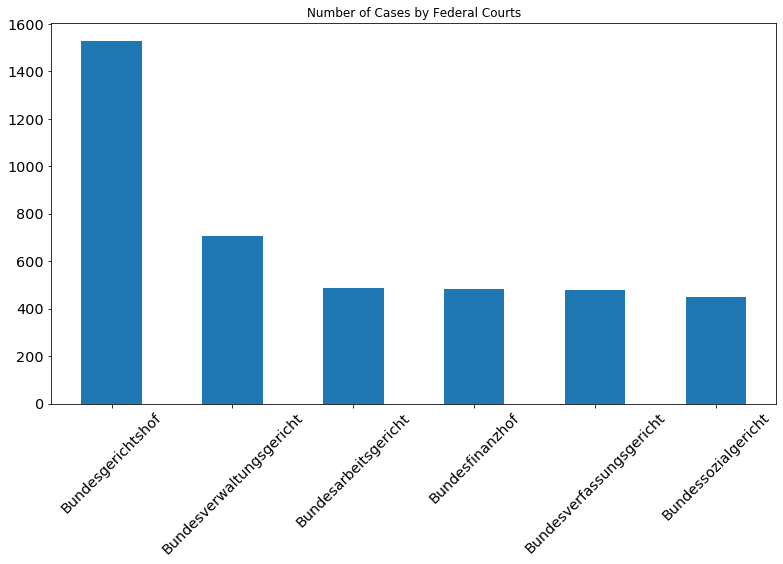

In [80]:
bundesgerichte = merged[merged["court_name"].str.contains("Bundes")]
bundesgerichte["court_name"].value_counts().plot.bar(figsize=(13,7), 
                                                     title = "Number of Cases by Federal Courts",
                                                   fontsize="x-large",rot=45,)

## Most Prolific Courts By Jurisdiction

We won't include Federal Courts

**Amtsgerichte**

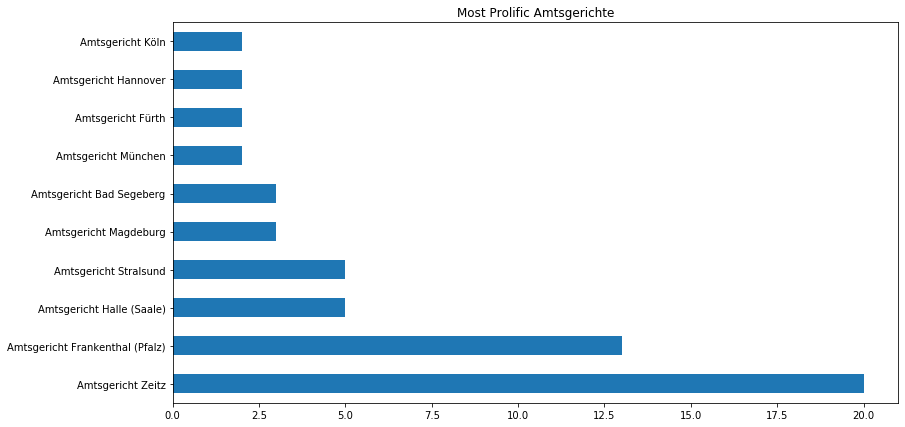

In [84]:
amtsgericht = merged[merged["court_name"].str.contains("Amtsgericht")]
amtsgericht["court_name"].value_counts().sort_values(ascending = False).head(10).plot.barh(figsize=(13,7),
                                                                                title = "Most Prolific Amtsgerichte")

**Arbeitsgerichte**

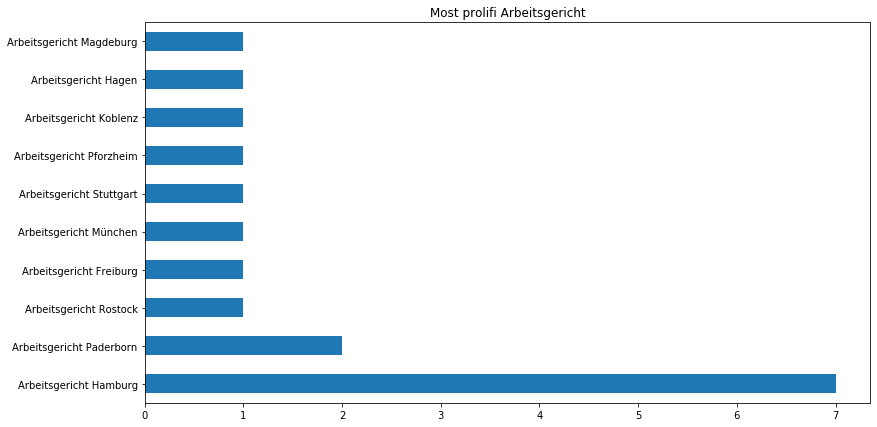

In [86]:
arbeitsgerichte = merged[merged["court_name"].str.contains("Arbeitsgericht")]
arbeitsgerichte["court_name"].value_counts().sort_values(ascending = False).head(10).plot.barh(figsize=(13,7),
                                                                                             title = "Most prolifi Arbeitsgericht")

**Verwaltungsgerichte**

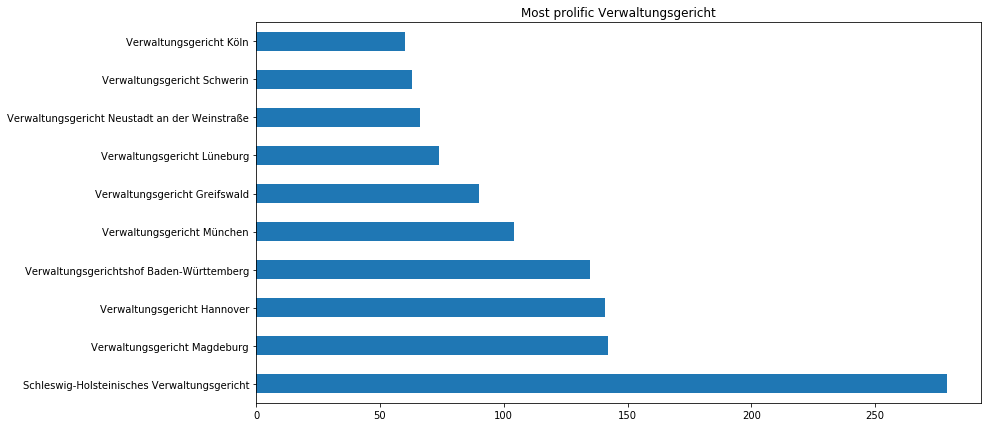

In [87]:
verwaltungsgerichte = merged[merged["court_name"].str.contains("Verwaltungsgericht")]
verwaltungsgerichte["court_name"].value_counts().sort_values(ascending = False).head(10).plot.barh(figsize=(13,7),
                                                                                                  title = "Most prolific Verwaltungsgericht")

**Sozialgericht**

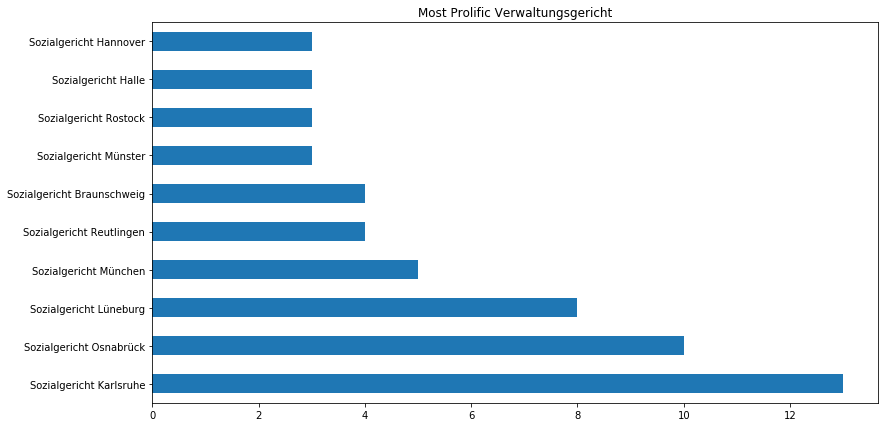

In [89]:
sozial = merged[merged["court_name"].str.contains("Sozialgericht")]
sozial["court_name"].value_counts().sort_values(ascending = False).head(10).plot.barh(figsize=(13,7),
                                                                            title = "Most Prolific Verwaltungsgericht")

**State Courts**

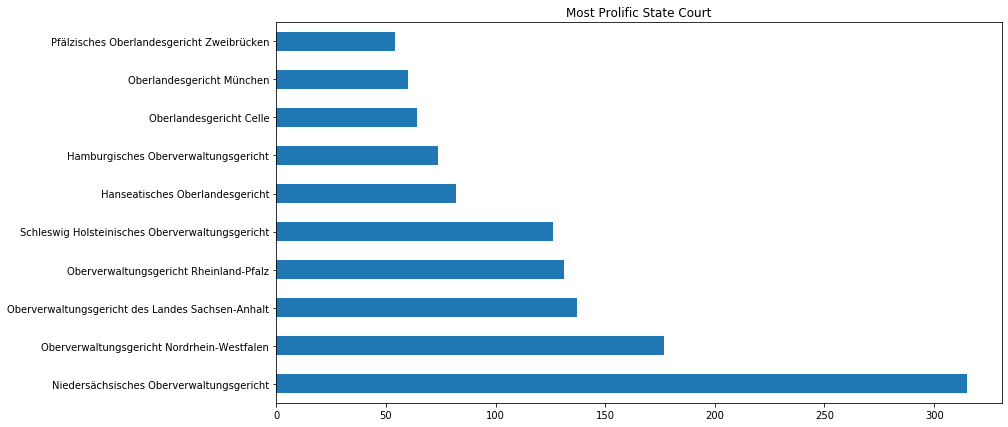

In [90]:
state = merged[(merged["court_name"].str.contains("Ober"))|(merged["court_name"].str.contains("Ladngericht"))]
state["court_name"].value_counts().sort_values(ascending = False).head(10).plot.barh(figsize=(13,7),
                                                                           title = "Most Prolific State Court")

# Conclusion

In this project, we extracted and cleaned some data made available by the Open Legal Data API.

We then cleaned some of the data, in order to make analysis easier, as well as proceeded some initial analysis. 